Kuis 3 No 11

1.   Pramaditya Ardian Saputra



Dalam perayaan panen singkong selalu ada kontes panen terberat, terdapat 10 peserta yang mengikuti kontes singkong terbesar. Ketika kontes ditutup, juri mencatat berat singkong masing-masing peserta. Berikut hasil berat singkong dari kesepuluh peserta.

Peserta         1   2   3   4   5   6   7   8   9   10

Berat 
singkong (kg)   2   3   1   50  4   2   3   1   4   2

 

Apakah ada data pencilan dalam data tersebut? Jika iya, hapus data pencilan tersebut sehingga diperoleh list nilai baru tanpa pencilan.

In [1]:
# Import Packages
import pandas as pd
import numpy as np
import statistics
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

Describe Data

In [28]:
# Load datasheet
data = {
    'Peserta': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Berat_singkong': [2, 3, 1, 50, 4, 2, 3, 1, 4, 2]
}

df = pd.DataFrame(data)
print(df)

   Peserta  Berat_singkong
0        1               2
1        2               3
2        3               1
3        4              50
4        5               4
5        6               2
6        7               3
7        8               1
8        9               4
9       10               2


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Peserta         10 non-null     int64
 1   Berat_singkong  10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [30]:
df.describe()

,Peserta,Berat_singkong
count,10.00000,10.000000
mean,5.50000,7.200000
std,3.02765,15.076103
min,1.00000,1.000000
25%,3.25000,2.000000
50%,5.50000,2.500000
75%,7.75000,3.750000
max,10.00000,50.000000


Deteksi Outliers

Text(0.5, 0, 'Berat Singkong')

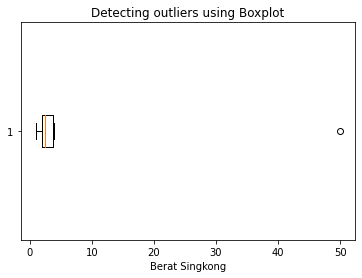

In [31]:
# Deteksi dengan boxplot
plt.boxplot(list(df.Berat_singkong), vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Berat Singkong')

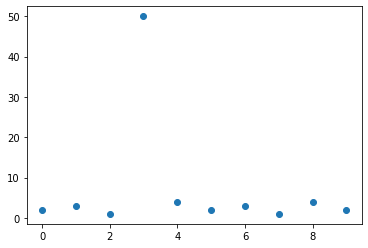

In [32]:
# Deteksi dengan scatter plot
plt.scatter(range(0,len(list(df.Berat_singkong))), list(df.Berat_singkong))
plt.show()

In [33]:
# Fungsi Pendeteksian Outlier dengan IQR
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)

    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
sample_outliers = detect_outliers_iqr(df.Berat_singkong)
print("Outliers from IQR method: ", sample_outliers)

Outliers from IQR method:  [50]


In [34]:
# Deteksi outlier dengan IQR
outliers = detect_outliers_iqr(list(df.Berat_singkong))
print("Outliers Overs from IQR method: ", outliers)
print("Banyaknya outlier: ",len(outliers))

Outliers Overs from IQR method:  [50]
Banyaknya outlier:  1


Mengatasi Outliers

1. Deleting

In [35]:
# Deleting
tr = []
for j in list(df.Berat_singkong):
    f = j in outliers
    if f is False:
        tr.append(j)

In [36]:
print("Banyaknya data sebelum diatasi outlier: ",len(list(df.Berat_singkong)))
print("Banyaknya data setelah diatasi outlier: ",len(tr))

Banyaknya data sebelum diatasi outlier:  10
Banyaknya data setelah diatasi outlier:  9


Text(0.5, 0, 'Berat Singkong')

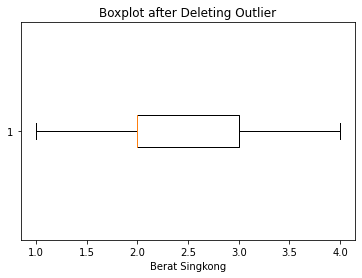

In [37]:
# Boxplot setelah penghapusan data
plt.boxplot(tr, vert=False)
plt.title("Boxplot after Deleting Outlier")
plt.xlabel('Berat Singkong')

2. Replace dengan median data

In [38]:
e = []
for y in list(df.Berat_singkong):
    ff = y in outliers
    if ff is True:
        y=statistics.median(list(df.Berat_singkong))
    else:
        y=y
    e.append(y)

In [39]:
# Menghitung nilai mean dan median data
print("Mean data : ",statistics.mean(list(df.Berat_singkong)))
print("Median data : ",statistics.median(list(df.Berat_singkong)))
print("Mean data setelah replacing median : ",statistics.mean(e))
print("Median data setelah replacing median: ",statistics.median(e))

Mean data :  7.2
Median data :  2.5
Mean data setelah replacing median :  2.45
Median data setelah replacing median:  2.25


Text(0.5, 0, 'Berat Singkong')

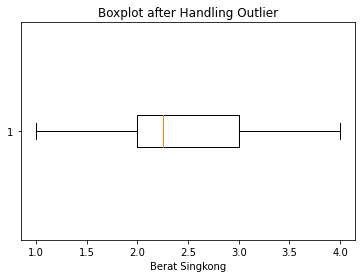

In [40]:
# Boxplot setelah replace median
plt.boxplot(e, vert=False)
plt.title("Boxplot after Handling Outlier")
plt.xlabel('Berat Singkong')